In [50]:
import pandas as pd

# 创建员工信息的 DataFrame
employee_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 45],
    'DepartmentID': [101, 102, 101, 103, 102]
}

# 创建 DataFrame
df_employees = pd.DataFrame(employee_data)

# 保存为 CSV 文件
df_employees.to_csv('employees.csv', index=False)

print("员工信息已保存为 employees.csv")

员工信息已保存为 employees.csv


In [51]:
# 创建部门信息的 DataFrame
department_data = {
    'DepartmentID': [101, 102, 103],
    'DepartmentName': ['HR', 'Engineering', 'Marketing'],
    'Location': ['New York', 'San Francisco', 'Chicago']
}

# 创建 DataFrame
df_departments = pd.DataFrame(department_data)

# 保存为 CSV 文件
df_departments.to_csv('departments.csv', index=False)

print("部门信息已保存为 departments.csv")

部门信息已保存为 departments.csv


In [52]:
# 读取员工信息 CSV 文件
df_employees = pd.read_csv('employees.csv')

print("读取的员工信息：")
print(df_employees)

读取的员工信息：
   EmployeeID     Name  Age  DepartmentID
0           1    Alice   25           101
1           2      Bob   30           102
2           3  Charlie   35           101
3           4    David   40           103
4           5      Eve   45           102


In [53]:
# 读取部门信息 CSV 文件
df_departments = pd.read_csv('departments.csv')

print("读取的部门信息：")
print(df_departments)

读取的部门信息：
   DepartmentID DepartmentName       Location
0           101             HR       New York
1           102    Engineering  San Francisco
2           103      Marketing        Chicago


In [54]:
# 按 'DepartmentID' 合并两个 DataFrame
df_merged = pd.merge(df_employees, df_departments, on='DepartmentID', how='left')

print("\n合并后的数据：")
print(df_merged)


合并后的数据：
   EmployeeID     Name  Age  DepartmentID DepartmentName       Location
0           1    Alice   25           101             HR       New York
1           2      Bob   30           102    Engineering  San Francisco
2           3  Charlie   35           101             HR       New York
3           4    David   40           103      Marketing        Chicago
4           5      Eve   45           102    Engineering  San Francisco


In [55]:
# 内连接（Inner Join）
df_inner = pd.merge(df_employees, df_departments, on='DepartmentID', how='inner')
print("\n内连接合并结果：")
print(df_inner)

# 外连接（Outer Join）
df_outer = pd.merge(df_employees, df_departments, on='DepartmentID', how='outer')
print("\n外连接合并结果：")
print(df_outer)

# 右连接（Right Join）
df_right = pd.merge(df_employees, df_departments, on='DepartmentID', how='right')
print("\n右连接合并结果：")
print(df_right)


内连接合并结果：
   EmployeeID     Name  Age  DepartmentID DepartmentName       Location
0           1    Alice   25           101             HR       New York
1           2      Bob   30           102    Engineering  San Francisco
2           3  Charlie   35           101             HR       New York
3           4    David   40           103      Marketing        Chicago
4           5      Eve   45           102    Engineering  San Francisco

外连接合并结果：
   EmployeeID     Name  Age  DepartmentID DepartmentName       Location
0           1    Alice   25           101             HR       New York
1           3  Charlie   35           101             HR       New York
2           2      Bob   30           102    Engineering  San Francisco
3           5      Eve   45           102    Engineering  San Francisco
4           4    David   40           103      Marketing        Chicago

右连接合并结果：
   EmployeeID     Name  Age  DepartmentID DepartmentName       Location
0           1    Alice   25       

In [56]:
# 将 'DepartmentName' 列转换为分类数据
df_merged['DepartmentName'] = df_merged['DepartmentName'].astype('category')

print("\n将 'DepartmentName' 转换为分类数据：")
print(df_merged.info())


将 'DepartmentName' 转换为分类数据：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   EmployeeID      5 non-null      int64   
 1   Name            5 non-null      object  
 2   Age             5 non-null      int64   
 3   DepartmentID    5 non-null      int64   
 4   DepartmentName  5 non-null      category
 5   Location        5 non-null      object  
dtypes: category(1), int64(3), object(2)
memory usage: 465.0+ bytes
None


In [57]:
# 查看分类数据的类别
print("\n分类数据的类别：")
print(df_merged['DepartmentName'].cat.categories)


分类数据的类别：
Index(['Engineering', 'HR', 'Marketing'], dtype='object')


In [58]:
# 按 'DepartmentName' 分组并计算每个部门的平均年龄
grouped = df_merged.groupby('DepartmentName')['Age'].mean()

print("\n按部门分组并计算平均年龄：")
print(grouped)


按部门分组并计算平均年龄：
DepartmentName
Engineering    37.5
HR             30.0
Marketing      40.0
Name: Age, dtype: float64


C:\Users\林肖阳\AppData\Local\Temp\ipykernel_30324\4024176610.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_merged.groupby('DepartmentName')['Age'].mean()


In [59]:
# 按 'DepartmentName' 分组并计算每个部门的员工数量
grouped_count = df_merged.groupby('DepartmentName').size()

print("\n按部门分组并计算员工数量：")
print(grouped_count)


按部门分组并计算员工数量：
DepartmentName
Engineering    2
HR             2
Marketing      1
dtype: int64


C:\Users\林肖阳\AppData\Local\Temp\ipykernel_30324\1114777633.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_count = df_merged.groupby('DepartmentName').size()


In [60]:
# 筛选年龄大于 30 的员工
filtered_df = df_merged[df_merged['Age'] > 30]

print("\n年龄大于 30 的员工：")
print(filtered_df)


年龄大于 30 的员工：
   EmployeeID     Name  Age  DepartmentID DepartmentName       Location
2           3  Charlie   35           101             HR       New York
3           4    David   40           103      Marketing        Chicago
4           5      Eve   45           102    Engineering  San Francisco


In [61]:
# 应用条件，为年龄大于 30 的员工添加标签
df_merged['AgeGroup'] = df_merged['Age'].apply(lambda x: 'Over 30' if x > 30 else 'Under 30')

print("\n添加标签后的数据：")
print(df_merged)


添加标签后的数据：
   EmployeeID     Name  Age  DepartmentID DepartmentName       Location  \
0           1    Alice   25           101             HR       New York   
1           2      Bob   30           102    Engineering  San Francisco   
2           3  Charlie   35           101             HR       New York   
3           4    David   40           103      Marketing        Chicago   
4           5      Eve   45           102    Engineering  San Francisco   

   AgeGroup  
0  Under 30  
1  Under 30  
2   Over 30  
3   Over 30  
4   Over 30  


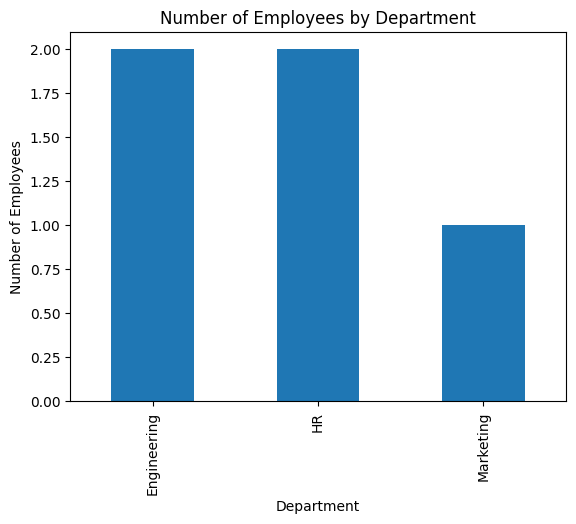

In [62]:
import matplotlib.pyplot as plt

# 绘制每个部门的员工数量柱状图
grouped_count.plot(kind='bar', title='Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

In [63]:
# 保存修改后的 DataFrame
df_merged.to_csv('merged_data.csv', index=False)

print("\n修改后的数据已保存为 merged_data.csv")


修改后的数据已保存为 merged_data.csv
